# Actividad: *Introducción a Machine Learning*

**Autor:** Juan Cruz Rey 
**Fecha:** 10/08/2025

> **Objetivo general:** Aprender a usar Jupyter Notebook para analizar datos, plantear y resolver problemas de clasificación o regresión con aprendizaje automático, describiendo y justificando el uso de variables y etiquetas según lo visto en el curso.

# Consigna

Cada estudiante deberá instalar Jupyter Notebook en su computadora para realizar la siguiente actividad y generar el archivo entregable:

1. Buscar en la web un Dataset que pueda ser utilizado para hacer Clasificación o Regresión.
2. En Jupyter Notebook, cargar el Dataset elegido y analizarlo. Esto implica:
    a. Imprimir algunos ejemplos con sus Features (por ejemplo, los primeros 10 ejemplos),
    b. Describir los Features que contiene (tipo de variable, si son números definir valor máximo y mínimo, si son categóricos, nombrar las categorías que tiene)
    c. Decidir si algún Feature puede ser usado como Label.
3. Describir un problema en donde pueda utilizarse este Dataset para que, usando Machine Learning, se pueda encontrar una solución para resolverlo. En caso de que ningún Feature sirva como Label al problema planteado, explicar brevemente (en texto, no código) cómo se podría crear dicho Label.

## 1) Selección del dataset para clasificación binaria

Para este proyecto, se realizó una búsqueda en **Kaggle** con el objetivo de encontrar un conjunto de datos adecuado para una tarea de *clasificación binaria*.  
Se seleccionó el dataset **Water Potability**, disponible en el siguiente enlace:  
[🔗 Ver dataset en Kaggle](https://www.kaggle.com/code/uom190346a/waterpotability-eda-data-visualization/notebook?select=water_potability.csv)  

Posteriormente, el archivo fue descargado y almacenado en el repositorio personal de GitHub:  
[📂 Repositorio en GitHub](https://github.com/JuanCruzMonteros/machine-learning/tree/main/Introducci%C3%B3n%20a%20Machine%20Learning)


## 2) Con el dataset elegido procedo a hacer un análisis exploratorio inicial

### 2.a) 

In [55]:
# Instalacion de librerías
import pandas as pd
import numpy as np

In [56]:
# Lectura de archivo csv
csv_path = "water_potability.csv"

df = pd.read_csv(csv_path)
print(f"Filas: {df.shape[0]} | Columnas: {df.shape[1]}")

Filas: 3276 | Columnas: 10


In [57]:
# imprimir ejemplos (primeros 10 registros):
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [58]:
# Ver la estructura del DataFrame (tipos, no nulos, memoria):
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [59]:
# Ver si hay nulos en las diferentes columnas por si necesito esas tuplas para evaluar potabilidad
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [60]:
# Resumen estadístico de las columnas numéricas
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### 2.b) Describir los Features que contiene (tipo de variable, si son números definir valor máximo y mínimo, si son categóricos, nombrar las categorías que tiene)

In [61]:
# Convertir la columna 'potability' a categórica
df["Potability"] = df["Potability"].astype("category")

# Detectar columnas numéricas y categóricas
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Columnas numéricas:", num_cols)
print("Columnas categóricas:", cat_cols)

# Para numéricas: rango min-max
print("\n=== Rango min-max para columnas numéricas ===")
print(df[num_cols].agg(["min", "max"]).T)

# Para categóricas: categorías y frecuencias
if cat_cols:
    print("\n=== Resumen de columnas categóricas ===")
    for c in cat_cols:
        print(f"\nColumna: {c}")
        print(df[c].value_counts(dropna=False))
else:
    print("\nNo hay columnas categóricas en este dataset.")


Columnas numéricas: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
Columnas categóricas: ['Potability']

=== Rango min-max para columnas numéricas ===
                        min           max
ph                 0.000000     14.000000
Hardness          47.432000    323.124000
Solids           320.942611  61227.196008
Chloramines        0.352000     13.127000
Sulfate          129.000000    481.030642
Conductivity     181.483754    753.342620
Organic_carbon     2.200000     28.300000
Trihalomethanes    0.738000    124.000000
Turbidity          1.450000      6.739000

=== Resumen de columnas categóricas ===

Columna: Potability
Potability
0    1998
1    1278
Name: count, dtype: int64


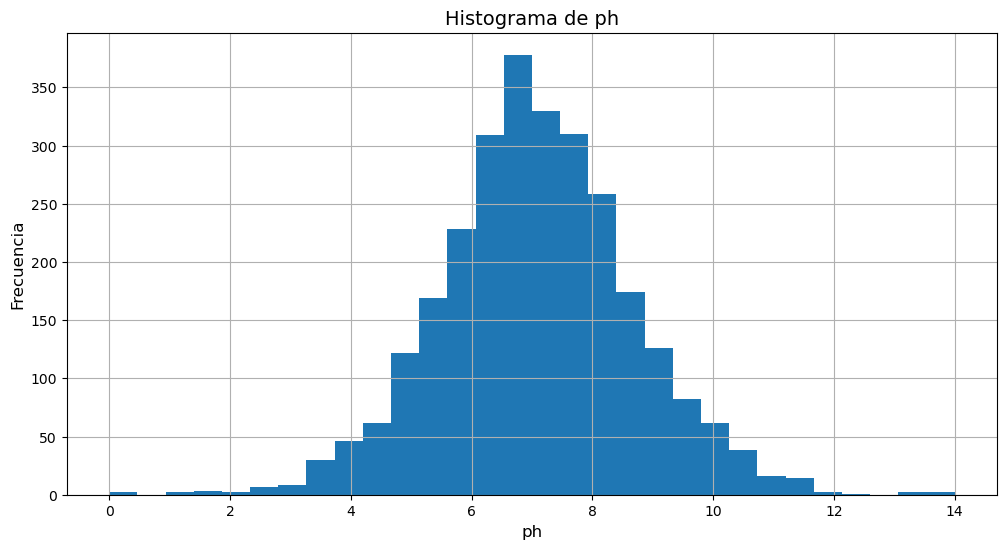

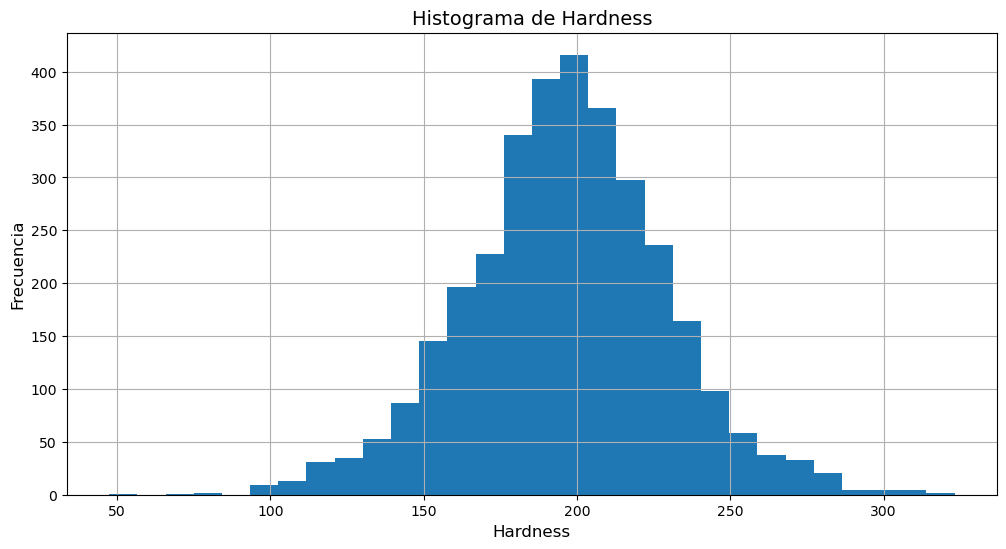

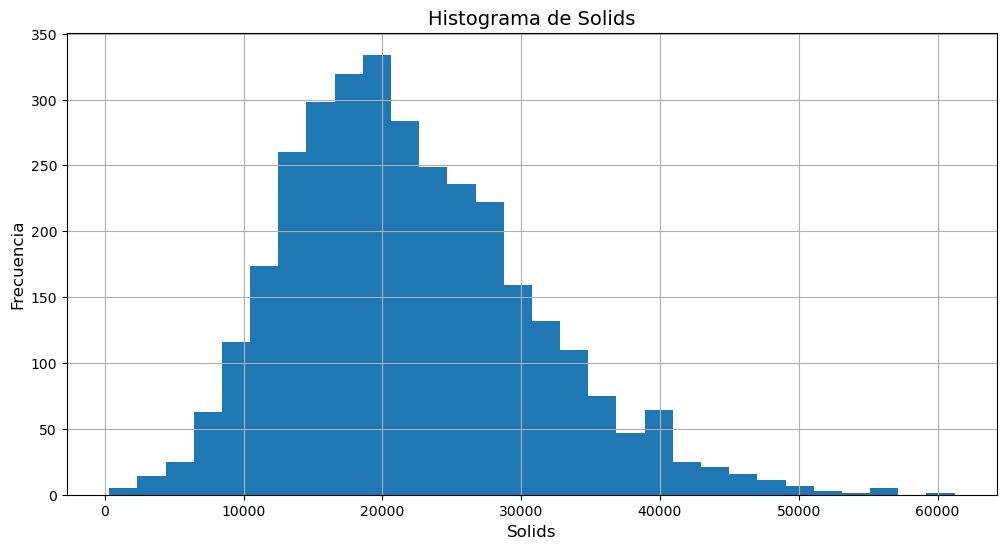

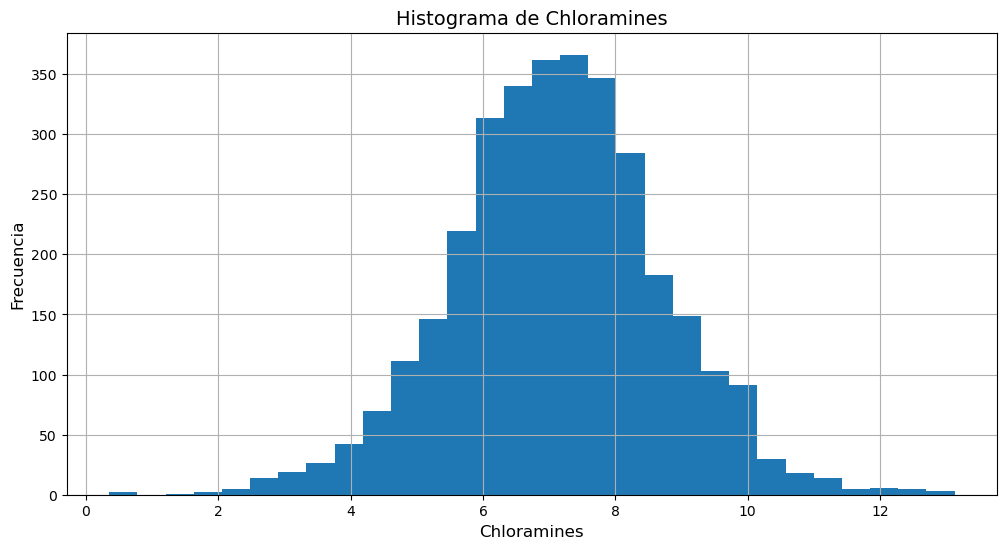

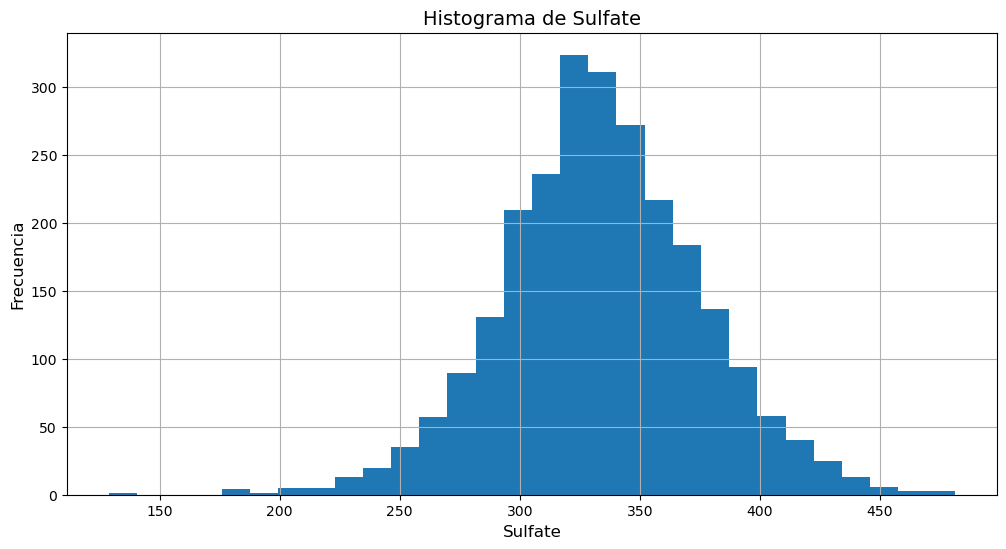

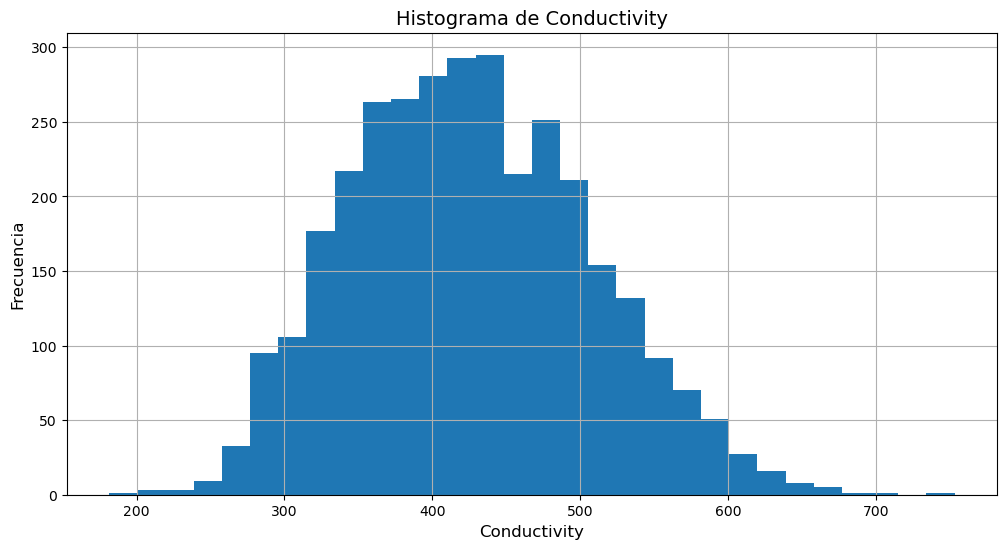

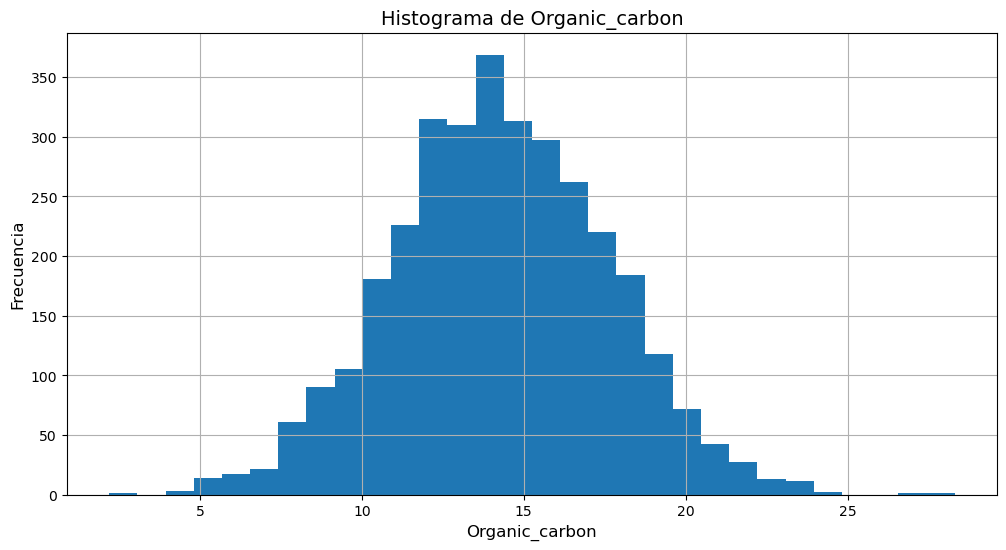

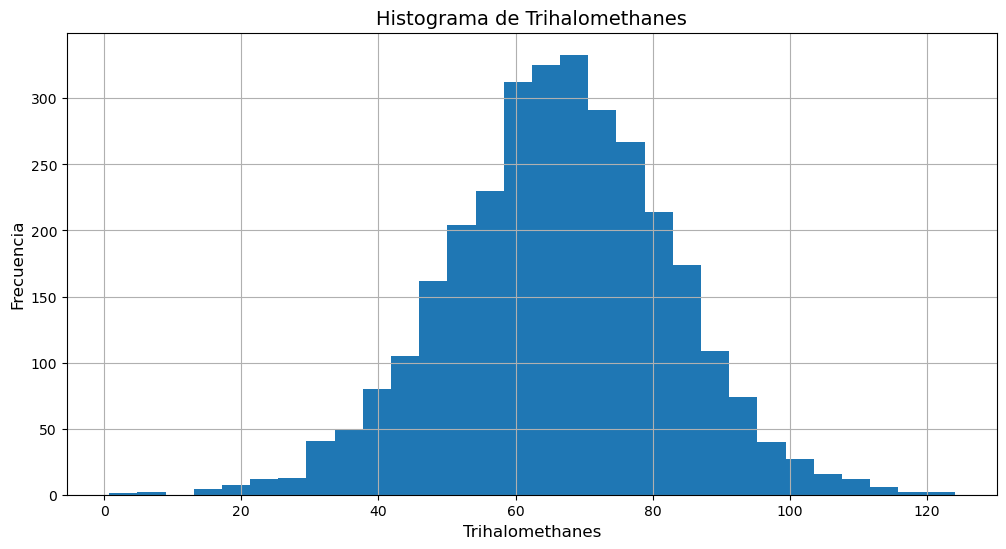

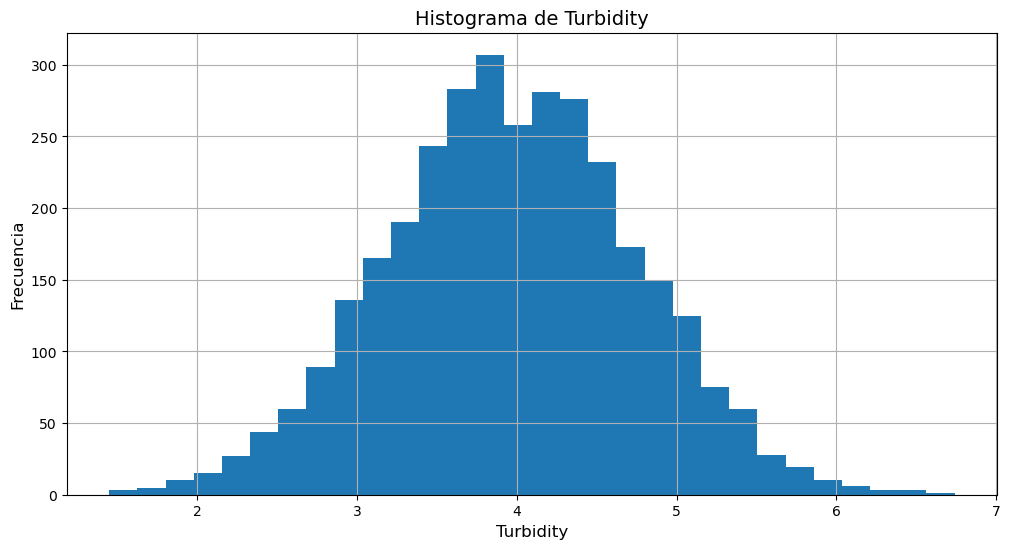

In [62]:
# Hacemos un histograma para ententer la distribución de cada variable antes de entrenar un modelo de Machine Learning.
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


### 2.c) Decidir si algún Feature puede ser usado como Label.

En mi dataset la columna ideal para ser usada como *label* para la clasificación binaria es Potability. Más adelante se mostrará como podríamos crearla en caso de no existir.
El feature "P" es el que se puede usar como label. Es una variable categórica que indica si la transacción fue fraudulenta o no.

In [63]:
# distribución
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [64]:
# Porcentajes:
df["Potability"].value_counts(normalize=True) * 100

Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64

# 3) Describir un problema en donde pueda utilizarse este Dataset para que, usando Machine Learning, se pueda encontrar una solución para resolverlo. En caso de que ningún Feature sirva como Label al problema planteado, explicar brevemente (en texto, no código) cómo se podría crear dicho Label.

Tenemos un _problema global_ en el acceso a agua potable. Actualmente, el proceso tradicional para evaluar la calidad del agua implica análisis químicos y microbiológicos que requieren laboratorios especializados, insumos y tiempo, lo que puede retrasar la toma de decisiones para garantizar la salud de la población.  

El conjunto de datos *Water Potability* contiene mediciones fisicoquímicas del agua (pH, dureza, sólidos disueltos, cloraminas, sulfatos, conductividad, carbono orgánico, trihalometanos y turbidez), junto con la variable *Potability*, que indica si el agua es apta para el consumo humano (1) o no (0).  

Mediante técnicas de *Machine Learning*, se podría entrenar un modelo capaz de predecir la potabilidad del agua a partir de estas mediciones, lo que permitiría:  

- Evaluaciones rápidas en campo con sensores básicos.  
- Monitoreo continuo en plantas de tratamiento.  
- Priorización de muestras que requieren análisis de laboratorio más exhaustivos.  

Esto ayudaría a optimizar recursos, reducir costos y actuar de forma preventiva ante riesgos para la salud.


En el caso elegido, tenemos una variable (“Potability”) que sirve como etiqueta para este problema. Si no existiera, podríamos construirla aplicando criterios definidos por la OMS o por normas nacionales de calidad del agua. Por ejemplo:
- pH entre 6,5 y 8,5
- Sólidos disueltos < 500 mg/L
- Turbidez < 5 NTU
- Trihalometanos < 80 µg/L

A partir de esos umbrales, etiquetaríamos con 1 si una muestra cumple todos los criterios y con 0 en caso contrario.